In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


#Read in the data

df = pd.read_csv(r'C:\Users\jlee1\Desktop\movies.csv')

In [2]:
#Look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#See if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
#Check data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#Remove missing data

df.dropna(axis='index', how='any', subset=['rating', 'budget', 'gross'], inplace=True)

In [6]:
#See if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

df.head()

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#Sort values by gross revenue in descending order

df.sort_values(by='gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [8]:
#Hypotheses:
# (1) Budget, and gross revenue will have high correlation
# (2) Company, and gross revenue will have high correlation

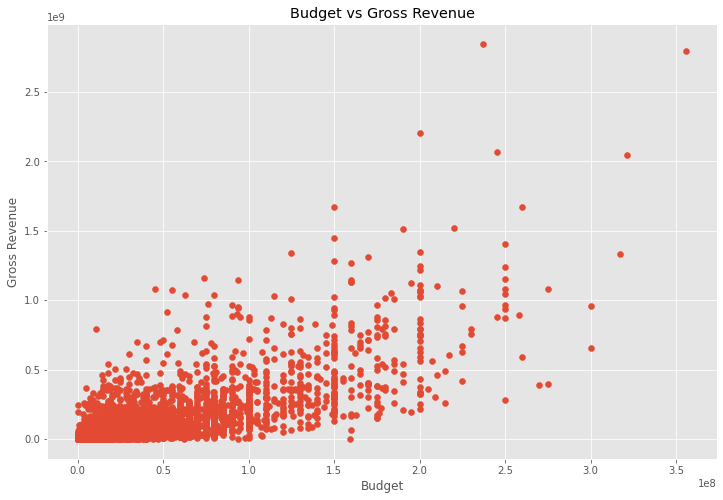

In [9]:
#Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget')

plt.ylabel('Gross Revenue')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

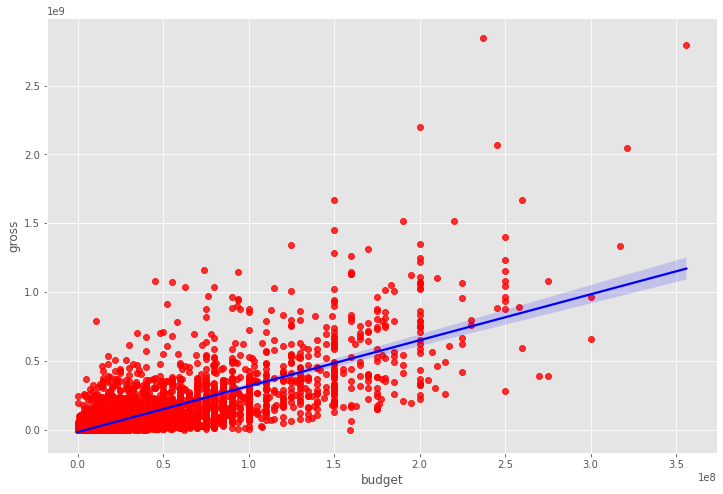

In [10]:
#Regression line using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [11]:
#Look at correlation

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056506,0.206161,0.327961,0.274395,0.075173
score,0.056506,1.000000,0.474349,0.072155,0.222709,0.414145
votes,0.206161,0.474349,1.000000,0.439757,0.614808,0.352331
budget,0.327961,0.072155,0.439757,1.000000,0.740263,0.318718
gross,0.274395,0.222709,0.614808,0.740263,1.000000,0.275830
runtime,0.075173,0.414145,0.352331,0.318718,0.275830,1.000000


In [12]:
#Confirmed: high correlation between budget, and gross

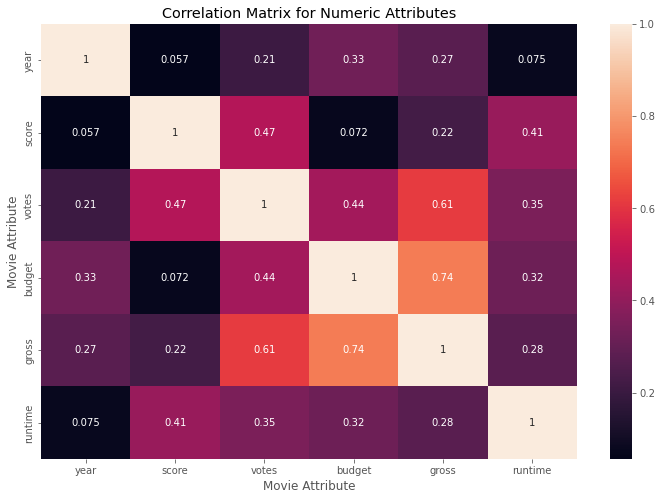

In [13]:
#View correlation matrix for numeric attributes

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Attributes')

plt.xlabel('Movie Attribute')

plt.ylabel('Movie Attribute')

plt.show()

In [14]:
#Assign numbers to objects in DataFrame

df_numberedobjects = df

for col_name in df_numberedobjects.columns:
    if(df_numberedobjects[col_name].dtype == 'object'):
        df_numberedobjects[col_name] = df_numberedobjects[col_name].astype('category')
        df_numberedobjects[col_name] = df_numberedobjects[col_name].cat.codes
        
df_numberedobjects

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4695,6,6,1980,1304,8.4,927000.0,1797,2834,699,46,19000000.0,46998772.0,1426,146.0
1,3932,6,1,1980,1127,5.8,65000.0,1579,1159,214,47,4500000.0,58853106.0,452,104.0
2,3643,4,0,1980,1359,8.7,1200000.0,757,1819,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1414,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,352,271,47,6000000.0,39846344.0,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2391,1812,47,90000000.0,426505244.0,452,124.0
7649,3558,4,0,2020,713,6.5,102000.0,852,2310,147,47,85000000.0,319715683.0,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1811,2829,1470,47,175000000.0,245487753.0,1397,101.0
7651,3981,4,1,2020,758,6.8,42000.0,294,2092,640,6,135000000.0,111105497.0,12,100.0


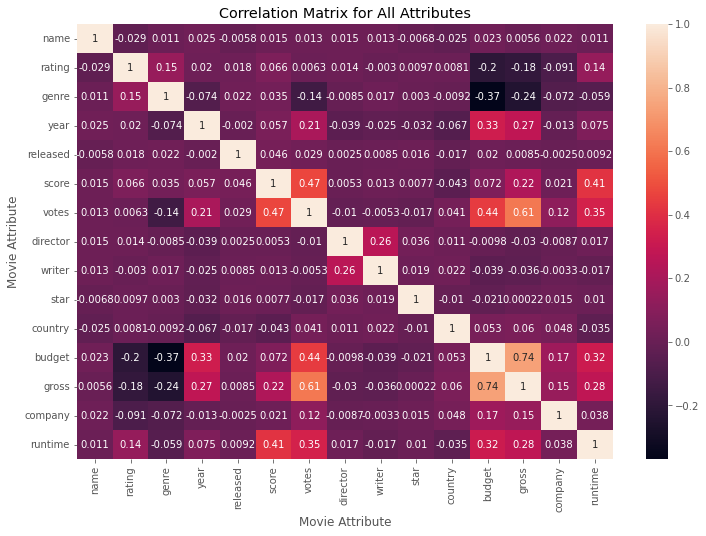

In [15]:
#View correlation matrix for all attributes

correlation_matrix = df_numberedobjects.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for All Attributes')

plt.xlabel('Movie Attribute')

plt.ylabel('Movie Attribute')

plt.show()

In [16]:
#Pivot the data for easier comparison

corr_mtrx = df_numberedobjects.corr()

corr_pairs = corr_mtrx.unstack()

corr_pairs

name     name        1.000000
         rating     -0.029271
         genre       0.010838
         year        0.025441
         released   -0.005783
                       ...   
runtime  country    -0.034514
         budget      0.318718
         gross       0.275830
         company     0.037797
         runtime     1.000000
Length: 225, dtype: float64

In [17]:
#Sort the pivoted data

sorted_corr_pairs = corr_pairs.sort_values()

sorted_corr_pairs

budget   genre     -0.368521
genre    budget    -0.368521
gross    genre     -0.244034
genre    gross     -0.244034
rating   budget    -0.203531
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
#Show pivoted correlations that are greater than 0.5

high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]

high_corr

votes     gross       0.614808
gross     votes       0.614808
          budget      0.740263
budget    gross       0.740263
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [19]:
#Confirmed hypothesis that budget, and gross revenue have high correlation
#Learned that company, and gross revenue have low correlation
#Also saw that votes and budget have high correlation to gross revenue